In [7]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from tensorflow import keras


In [8]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [9]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255

In [10]:
class_names = [ "T-shirt/top" , "Trouser" , "Pullover" , "Dress" , "Coat" , "Sandal" , "Shirt" , "Sneaker" , "Bag" , "Ankle boot" ]

In [11]:
model = keras.models.Sequential([keras.layers.Flatten(input_shape = [28, 28]), 
                                 keras.layers.Dense(300, activation = "relu" ), 
                                 keras.layers.Dense(100, activation = "relu" ), 
                                 keras.layers.Dense(100, activation = "relu" ),
                                 keras.layers.Dense(10, activation = "softmax" )]) 

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 276,710
Trainable params: 276,710
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(loss = "sparse_categorical_crossentropy", 
              optimizer = "sgd",
              metrics = ["accuracy"]) 

In [14]:
history = model.fit(X_train, 
                    y_train, 
                    epochs = 30, 
                    validation_data = (X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.7372 - accuracy: 0.7530 - val_loss: 0.5005 - val_accuracy: 0.8286
Epoch 2/30
1719/1719 [==============================] - 15s 9ms/step - loss: 0.4745 - accuracy: 0.8321 - val_loss: 0.4318 - val_accuracy: 0.8530
Epoch 3/30
1719/1719 [==============================] - 16s 9ms/step - loss: 0.4256 - accuracy: 0.8484 - val_loss: 0.4025 - val_accuracy: 0.8588
Epoch 4/30
1719/1719 [==============================] - 17s 10ms/step - loss: 0.3956 - accuracy: 0.8604 - val_loss: 0.4136 - val_accuracy: 0.8582
Epoch 5/30
1719/1719 [==============================] - 23s 14ms/step - loss: 0.3747 - accuracy: 0.8661 - val_loss: 0.3647 - val_accuracy: 0.8714
Epoch 6/30
1719/1719 [==============================] - 30s 18ms/step - loss: 0.3572 - accuracy: 0.8722 - val_loss: 0.3851 - val_accuracy: 0.8650
Epoch 7/30
1719/1719 [==============================] - 15s 9ms/step - loss: 0.3432 - accuracy: 0.8760 - val_loss: 0.3451 - val

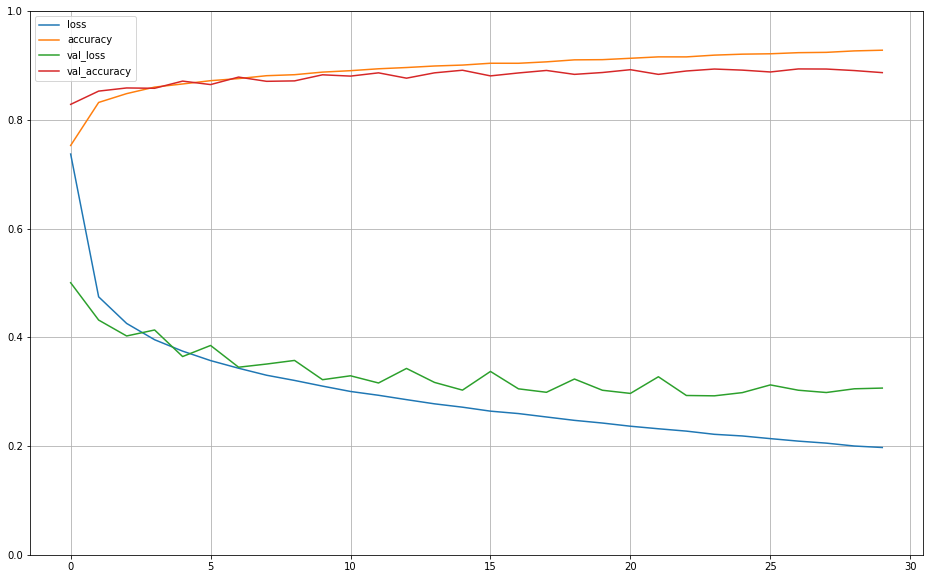

In [15]:
pd.DataFrame(history.history).plot(figsize = (16, 10)) 
plt.grid(True) 
plt.gca().set_ylim(0, 1) 
plt.show() 

In [10]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3316 - accuracy: 0.8812


[0.33164915442466736, 0.8812000155448914]

In [12]:
X_new = X_test[:10]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.24, 0.  , 0.01, 0.  , 0.  , 0.  , 0.75, 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.98, 0.  , 0.02, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.99, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  ]],
      dtype=float32)

In [17]:
y_pred = model.predict_classes(X_new)
y_pred
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt', 'Trouser',
       'Coat', 'Shirt', 'Sandal', 'Sneaker'], dtype='<U11')

# Regression

In [17]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
housing = fetch_california_housing()

In [18]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.fit_transform(X_valid)


In [19]:
model_regression = keras.models.Sequential([keras.layers.Dense(30, activation='relu', input_shape = X_train.shape[1:]),
keras.layers.Dense(1)])

In [20]:
model_regression.compile(loss='mean_squared_error', optimizer='sgd')

In [21]:
model_regression.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 30)                270       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 31        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [22]:
history_regrsssion = model_regression.fit(X_train, y_train, epochs = 10, validation_data=(X_valid, y_valid))

Epoch 1/10
363/363 [==============================] - 2s 5ms/step - loss: 0.9540 - val_loss: 0.8520
Epoch 2/10
363/363 [==============================] - 1s 4ms/step - loss: 0.7242 - val_loss: 0.4887
Epoch 3/10
363/363 [==============================] - 2s 4ms/step - loss: 0.5703 - val_loss: 0.5293
Epoch 4/10
363/363 [==============================] - 1s 4ms/step - loss: 0.4550 - val_loss: 0.6156
Epoch 5/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4401 - val_loss: 0.6967
Epoch 6/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4316 - val_loss: 0.8484
Epoch 7/10
363/363 [==============================] - 2s 5ms/step - loss: 0.4241 - val_loss: 0.9432
Epoch 8/10
363/363 [==============================] - 1s 4ms/step - loss: 0.4165 - val_loss: 1.0569
Epoch 9/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4113 - val_loss: 1.2956
Epoch 10/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4092 - val_loss: 1.4052

In [23]:
mse_test = model_regression.evaluate(X_test,y_test)

162/162 [==============================] - 0s 3ms/step - loss: 31083.4316


In [24]:
X_new = X_test[:3]
y_pred = model_regression.predict(X_new)
y_pred

array([[161.3848 ],
       [152.90894],
       [117.7132 ]], dtype=float32)

In [1]:
# TODO:  add RNN to solve MNIST Fashion

In [2]:
# TODO:  Format document into sections based on approach

In [3]:
# TODO:  Add images from MNIST Fashion data set to notebook 

In [4]:
# TODO:  Add commentary on what is happening with each network

In [5]:
# TODO:  Add conclusion and next steps